In [1]:
import numpy, scipy
import matplotlib.pyplot as mp
import netCDF4
import mpl_toolkits
from mpl_toolkits import basemap

% matplotlib inline

In [2]:
season='NDJFM'

In [3]:
model_names = numpy.array(( \
'ACCESS1-0', \
'ACCESS1.3', \
'bcc-csm1-1', \
'BNU-ESM', \
'CanESM2', \
'CanESM2', \
'CanESM2', \
'CanESM2', \
'CanESM2', \
'CCSM4', \
'CCSM4', \
'CCSM4', \
'CCSM4', \
'CCSM4', \
'CCSM4', \
'CESM1-BGC', \
'CESM1-CAM5', \
'CESM1-CAM5', \
'CESM1-CAM5', \
'CMCC-CM', \
'CMCC-CMS', \
'CNRM-CM5', \
'CNRM-CM5', \
'CNRM-CM5', \
'CNRM-CM5', \
'CNRM-CM5', \
'CSIRO-Mk3-6-0', \
'CSIRO-Mk3-6-0', \
'CSIRO-Mk3-6-0', \
'CSIRO-Mk3-6-0', \
'CSIRO-Mk3-6-0', \
'CSIRO-Mk3-6-0', \
'CSIRO-Mk3-6-0', \
'CSIRO-Mk3-6-0', \
'CSIRO-Mk3-6-0', \
'CSIRO-Mk3-6-0', \
'EC-EARTH', \
'EC-EARTH', \
'EC-EARTH', \
'EC-EARTH', \
'FGOALS_g2', \
'FIO-ESM', \
'FIO-ESM', \
'FIO-ESM', \
'GFDL-CM3', \
'GFDL-ESM2G', \
'GFDL-ESM2M', \
'GISS-E2-H', \
'GISS-E2-H', \
'GISS-E2-H', \
'GISS-E2-R', \
'GISS-E2-R', \
'GISS-E2-R', \
'HadGEM2-AO', \
'HadGEM2-CC', \
'HadGEM2-ES', \
'HadGEM2-ES', \
'HadGEM2-ES', \
'HadGEM2-ES', \
'inmcm4', \
'IPSL-CM5A-LR', \
'IPSL-CM5A-LR', \
'IPSL-CM5A-LR', \
'IPSL-CM5A-LR', \
'IPSL-CM5A-MR', \
'IPSL-CM5B-LR', \
'MIROC5', \
'MIROC5', \
'MIROC5', \
'MIROC-ESM', \
'MIROC-ESM-CHEM', \
'MPI-ESM-LR', \
'MPI-ESM-LR', \
'MPI-ESM-LR', \
'MPI-ESM-MR', \
'MRI-CGCM3', \
'NorESM1-M', \
'NorESM1-ME' ))

In [4]:
model_names_unique = numpy.unique(model_names)

In [5]:
print(model_names_unique, model_names_unique.shape)

['ACCESS1-0' 'ACCESS1.3' 'BNU-ESM' 'CCSM4' 'CESM1-BGC' 'CESM1-CAM5'
 'CMCC-CM' 'CMCC-CMS' 'CNRM-CM5' 'CSIRO-Mk3-6-0' 'CanESM2' 'EC-EARTH'
 'FGOALS_g2' 'FIO-ESM' 'GFDL-CM3' 'GFDL-ESM2G' 'GFDL-ESM2M' 'GISS-E2-H'
 'GISS-E2-R' 'HadGEM2-AO' 'HadGEM2-CC' 'HadGEM2-ES' 'IPSL-CM5A-LR'
 'IPSL-CM5A-MR' 'IPSL-CM5B-LR' 'MIROC-ESM' 'MIROC-ESM-CHEM' 'MIROC5'
 'MPI-ESM-LR' 'MPI-ESM-MR' 'MRI-CGCM3' 'NorESM1-M' 'NorESM1-ME'
 'bcc-csm1-1' 'inmcm4'] (35,)


In [5]:
ensemble_indices = ['{:03}'.format(i) for i in range(78)]

In [6]:
file_root = '/Users/baird/Dropbox/_data_analyzed/cmip5_KNMI_calculations/pr/'

model_filenames = numpy.array(( \
[ensemble_indices[i] +'_'+ model_names[i] +'_pr_1970-2000_and_2070-2100_climatology_NDJFM.nc' for i in range(78)] ))

In [7]:
# example file to get lat/lon info
ncfile = netCDF4.Dataset(file_root+model_filenames[0], 'r', format='NETCDF4')
model_lat = ncfile.variables['lat'][:]
model_lon = ncfile.variables['lon'][:]

In [8]:
anomaly_fields = numpy.zeros((model_names.size, model_lat.size, model_lon.size))
for i in range(model_names.size):
    ncfile = netCDF4.Dataset(file_root+model_filenames[i], 'r', format='NETCDF4')
    anomaly_fields[i,:,:] = ncfile.variables['pr_anom'][:,:]

# Taking mean of multiple-run members

In [9]:
# take mean of realizations
anomaly_fields_unique = numpy.zeros((model_names_unique.size, model_lat.size, model_lon.size))
hist_clim_unique = numpy.zeros((model_names_unique.size, model_lat.size, model_lon.size))
rcp_clim_unique = numpy.zeros((model_names_unique.size, model_lat.size, model_lon.size))
#for i in range(model_names_unique.size):
n_members = numpy.array(([numpy.sum(model_names==model_names_unique[i]) for i in range(model_names_unique.size)]))
print(n_members)

for i in range(n_members.size):
    start_index = numpy.sum(n_members[0:i])
    end_index = numpy.sum(n_members[0:i+1])
    #print(start_index, end_index)
    anomaly_fields_unique[i,:,:] = numpy.mean(anomaly_fields[start_index:end_index,:,:], axis=0)

[ 1  1  1  6  1  3  1  1  5 10  5  4  1  3  1  1  1  3  3  1  1  4  4  1  1
  1  1  3  3  1  1  1  1  1  1]


In [10]:
agreement_positive = numpy.zeros((model_lat.shape[0], model_lon.shape[0]))
for j in range(model_lat.shape[0]):
    for k in range(model_lon.shape[0]):
        agreement_positive[j,k] = numpy.sum(anomaly_fields[:,j,k]>0)

agreement_positive_unique = numpy.zeros((model_lat.shape[0], model_lon.shape[0]))
for j in range(model_lat.shape[0]):
    for k in range(model_lon.shape[0]):
        agreement_positive_unique[j,k] = numpy.sum(anomaly_fields_unique[:,j,k]>0)

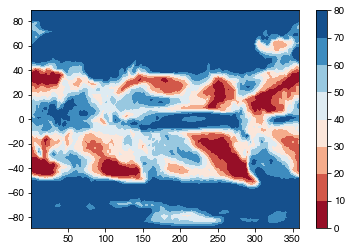

In [11]:
cf = mp.contourf(model_lon, model_lat, agreement_positive, cmap='RdBu')
mp.colorbar(cf)

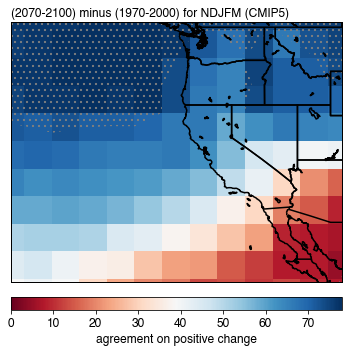

In [12]:
fontsize=12
contour_levels = numpy.arange(0,2.21,0.1)

fig = mp.figure(figsize=(5,5))
ax = fig.add_subplot(111)

map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=25.9,urcrnrlat=49.5,llcrnrlon=220.,urcrnrlon=250.,resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
# draw parallels and meridians. # labels[left, right, top, bottom]
#map.drawparallels(numpy.arange(-80.,81.,5.), labels=[1,0,0,0], dashes=[3,2], fontsize=fontsize, color='0')
#map.drawmeridians(numpy.arange(-180.,181.,10.), labels=[0,0,0,1], dashes=[3,2], fmt=format_every_other, fontsize=fontsize, color='0')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
#map.drawmapboundary(linewidth=1, color='0.5', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(model_lon, model_lat)
xi,yi = map(lons, lats)

mp.rcParams['hatch.color'] = '0.5'
pr_map = map.pcolormesh(xi, yi, agreement_positive, cmap='RdBu', zorder=2, vmin=0, vmax=model_names.size, ax=ax, latlon=True)
pr_stipple = map.contourf(xi, yi, agreement_positive, colors='None', hatches=['..',None,'..'], levels=[-0.5,0.05*78,0.95*78,100], zorder=2)
#colors='none', levels=[0.0,0.05,1.0], hatches=['...',None], extend='lower')
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
#cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal', extend='max')
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('agreement on positive change', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

ax.text(s='(2070-2100) minus (1970-2000) for NDJFM (CMIP5)', x=0, y=1.01, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
fig.tight_layout()
mp.savefig('agreement_plot_NDJFM_cmip5_ensemble_78members.pdf', transparent=True, bbox_inches='tight')

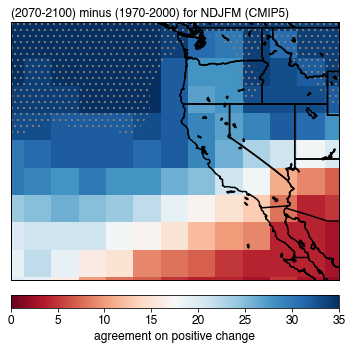

In [13]:
fontsize=12

fig = mp.figure(figsize=(5,5))
ax = fig.add_subplot(111)

map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=25.9,urcrnrlat=49.5,llcrnrlon=220.,urcrnrlon=250.,resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
# draw parallels and meridians. # labels[left, right, top, bottom]
#map.drawparallels(numpy.arange(-80.,81.,5.), labels=[1,0,0,0], dashes=[3,2], fontsize=fontsize, color='0')
#map.drawmeridians(numpy.arange(-180.,181.,10.), labels=[0,0,0,1], dashes=[3,2], fmt=format_every_other, fontsize=fontsize, color='0')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
#map.drawmapboundary(linewidth=1, color='0.5', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(model_lon, model_lat)
xi,yi = map(lons, lats)

mp.rcParams['hatch.color'] = '0.5'
pr_map = map.pcolormesh(xi, yi, agreement_positive_unique, cmap='RdBu', zorder=2, vmin=0, vmax=model_names_unique.size, ax=ax, latlon=True)
pr_stipple = map.contourf(xi, yi, agreement_positive_unique, colors='None', hatches=['..',None,'..'], levels=[-0.5,0.05*35,0.95*35,100], zorder=2)
#colors='none', levels=[0.0,0.05,1.0], hatches=['...',None], extend='lower')
divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
#cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal', extend='max')
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('agreement on positive change', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)

ax.text(s='(2070-2100) minus (1970-2000) for NDJFM (CMIP5)', x=0, y=1.01, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)
fig.tight_layout()
mp.savefig('agreement_plot_NDJFM_cmip5_ensemble_35members.pdf', transparent=True, bbox_inches='tight')

# Save ncfiles

In [ ]:
# save hist clim
filename = '/home/baird/CMIP5_climatologies_anomalies_agreement.nc'
ncfile = netCDF4.Dataset(filename, 'w', format='NETCDF4')

lat_dim = ncfile.createDimension('lat', pr_lat.size)
lon_dim = ncfile.createDimension('lon', pr_lon.size)

lat_var = ncfile.createVariable('lat', 'f4', ('lat',))
lon_var = ncfile.createVariable('lon', 'f4', ('lon',))
lat_var[:] = pr_lat
lon_var[:] = pr_lon
lat_var.units = 'degrees_north'
lon_var.units = 'degrees_east'

hist_clim_var = ncfile.createVariable('hist_clim', 'f4', ('lat','lon'))
hist_clim_var[:] = hist_mmem_clim
hist_clim_var.units = 'mm day-1'
hist_clim_var.description = 'Historical climatology for NDJFM during 1970-2000, calculated from monthly data'

rcp_clim_var = ncfile.createVariable('rcp_clim', 'f4', ('lat','lon'))
rcp_clim_var[:] = rcp_mmem_clim
rcp_clim_var.units = 'mm day-1'
rcp_clim_var.description = 'RCP8.5 climatology for NDJFM during 2070-2100, calculated from monthly data'

rcp_minus_hist_var = ncfile.createVariable('rcp_minus_hist', 'f4', ('lat','lon'))
rcp_minus_hist_var[:] = rcp_minus_hist
rcp_minus_hist_var.units = 'mm day-1'
rcp_minus_hist_var.description = 'RCP8.5 minus historical climatologies (2070-2100 minus 1970-2000) for NDJFM, calculated from monthly data'

ttest_pvals_var = ncfile.createVariable('ttest_pvals', 'f4', ('lat','lon'))
ttest_pvals_var[:] = pvals_array
ttest_pvals_var.units = 'unitless'
ttest_pvals_var.description = 'P-values from a t-test on the difference of the mean of independent samples (scipy.stats.ttest_ind()) with unequal variances'

agreement_var = ncfile.createVariable('agreement', 'f4', ('lat','lon'))
agreement_var[:] = agreement_positive
agreement_var.units = 'number of ensemble members (out of 40)'
agreement_var.description = 'Number of ensemble members that agrees on a positive end-of-century change'

ncfile.history = 'Created ' + time.ctime(time.time())
ncfile.close()
print(filename, "saved")